# Introduction
## Dataset Overview
The dataset under analysis was collected from a study conducted on Mexican mestizo patients newly diagnosed with Clinically Isolated Syndrome (CIS) at the National Institute of Neurology and Neurosurgery (NINN) in Mexico City, Mexico, between 2006 and 2010. The primary objective of this analysis is to identify factors that predict the conversion of CIS to Multiple Sclerosis (MS).

Article: https://pubmed.ncbi.nlm.nih.gov/37429750/

## Project Scope
The scope of this project includes:
- Exploratory Data Analysis (EDA) to understand the distribution and relationships between different features.
- Building and evaluating several machine learning models, including Logistic Regression, Random Forest, SVM, Gradient Boosting, and a Neural Network using TensorFlow, to predict whether a patient will have MS based on the given criteria.
- Comparing the performance of these models using various metrics and visualizations.
- Analyzing feature importance to understand the most influential factors in predicting the outcome.


Dataset:https://www.kaggle.com/datasets/surbhi1425/multiple-sclerosis-sample-data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [4]:
# Fill missing values with median
df['Initial_EDSS'].fillna(df['Initial_EDSS'].median(), inplace=True)
df['Final_EDSS'].fillna(df['Final_EDSS'].median(), inplace=True)

# Get a summary of the numerical columns
df.describe()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,136.000000,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.164835,1.205128,1.542125
std,78.952517,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.435478,0.494502,0.499137
min,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,68.000000,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,136.000000,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,204.000000,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,272.000000,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000


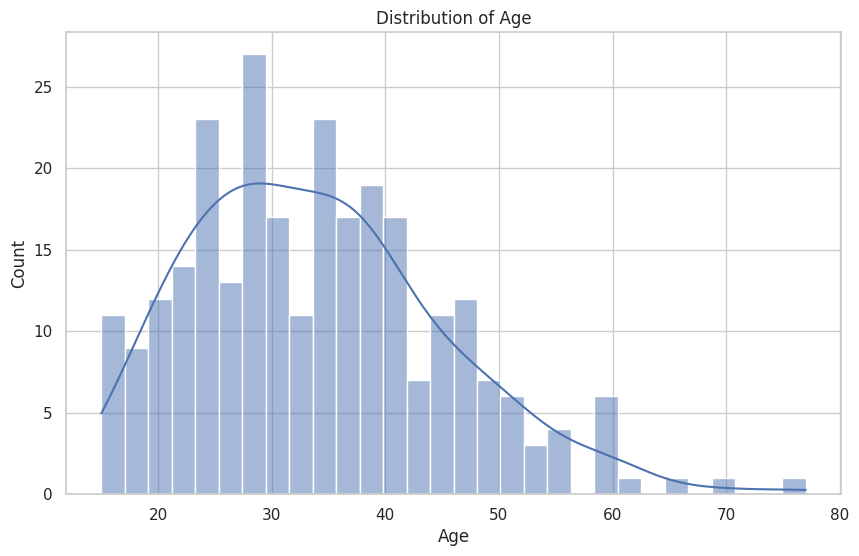

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style='whitegrid')

# Create a histogram for the Age column
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

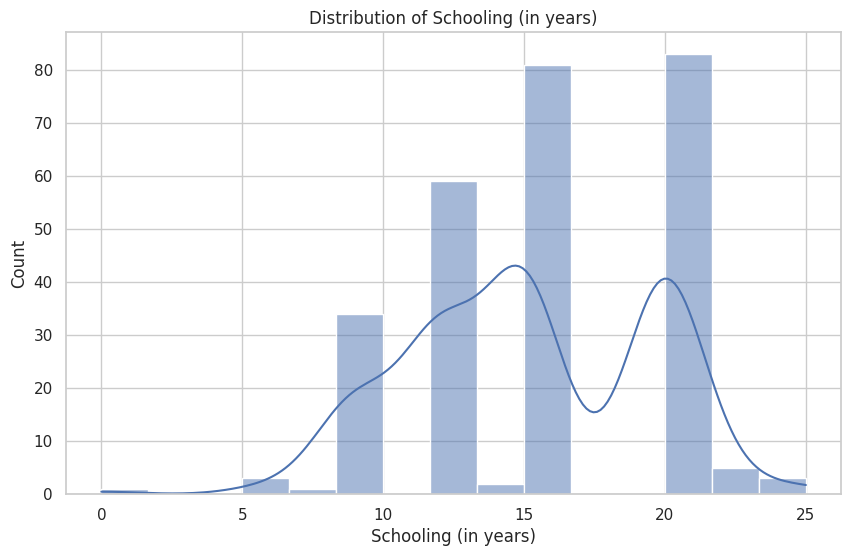

In [6]:
# Create a histogram for the Schooling column
plt.figure(figsize=(10, 6))
sns.histplot(df['Schooling'], kde=True, bins=15)
plt.title('Distribution of Schooling (in years)')
plt.xlabel('Schooling (in years)')
plt.ylabel('Count')
plt.show()

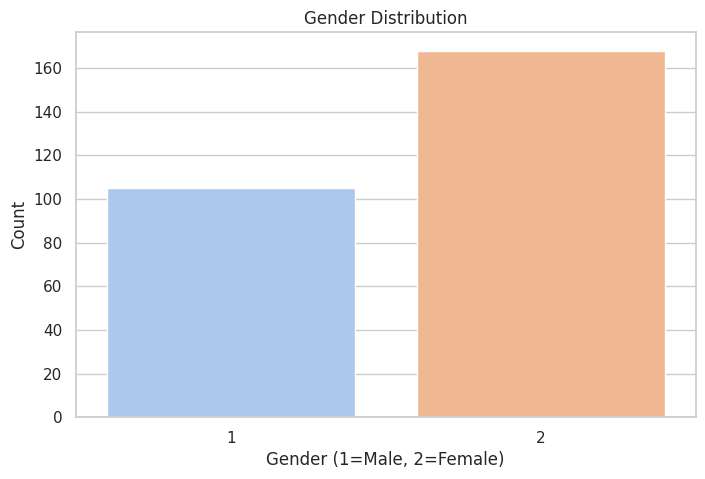

In [7]:
# Create a bar plot for the Gender column
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count')
plt.show()

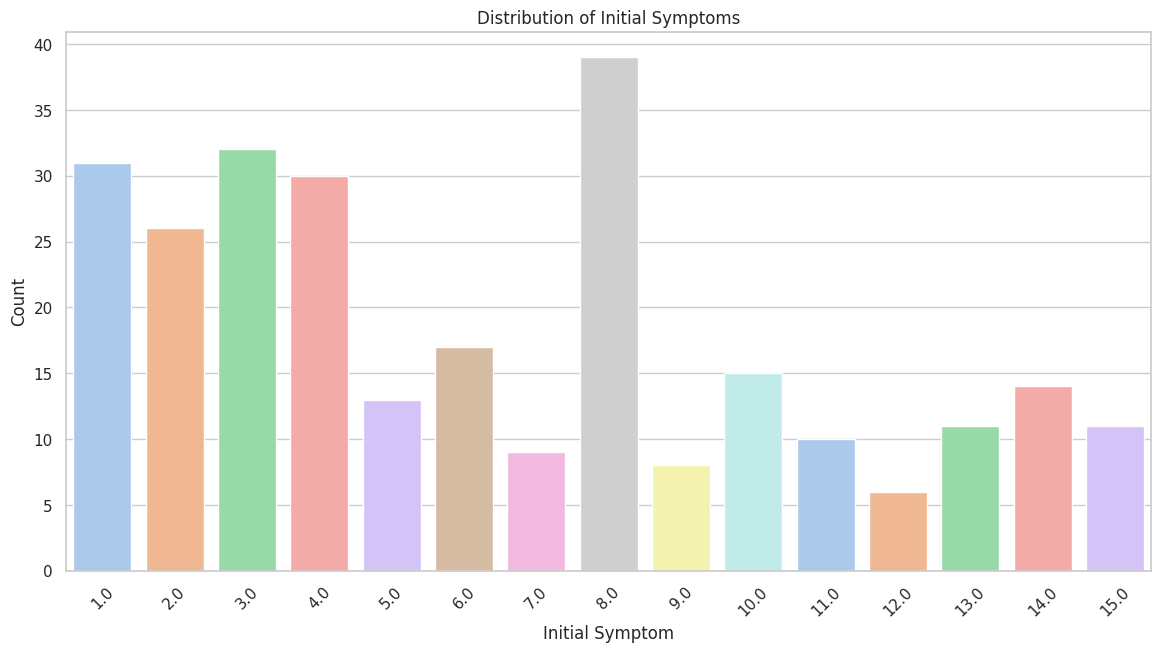

In [8]:
# Create a bar plot for the Initial_Symptom column
plt.figure(figsize=(14, 7))
sns.countplot(x='Initial_Symptom', data=df, palette='pastel')
plt.title('Distribution of Initial Symptoms')
plt.xlabel('Initial Symptom')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Legend for Initial Symptoms:
- **1:** Visual
- **2:** Sensory
- **3:** Motor
- **4:** Other
- **5:** Visual and Sensory
- **6:** Visual and Motor
- **7:** Visual and Others
- **8:** Sensory and Motor
- **9:** Sensory and Other
- **10:** Motor and Other
- **11:** Visual, Sensory and Motor
- **12:** Visual, Sensory and Other
- **13:** Visual, Motor and Other
- **14:** Sensory, Motor and Other
- **15:** Visual, Sensory, Motor and Other

### Modeling

In [9]:
# Splitting the data into features (X) and target (y) using the correct column name
X = df.drop('group', axis=1)
y = df['group']

# Display the first few rows of features and target
X.head(), y.head()

(   Unnamed: 0  Gender  Age  Schooling  Breastfeeding  Varicella  \
 0           0       1   34       20.0              1          1   
 1           1       1   61       25.0              3          2   
 2           2       1   22       20.0              3          1   
 3           3       2   41       15.0              1          1   
 4           4       2   34       20.0              2          1   
 
    Initial_Symptom  Mono_or_Polysymptomatic  Oligoclonal_Bands  LLSSEP  \
 0              2.0                        1                  0       1   
 1             10.0                        2                  1       1   
 2              3.0                        1                  1       0   
 3              7.0                        2                  1       0   
 4              6.0                        2                  0       1   
 
    ULSSEP  VEP  BAEP  Periventricular_MRI  Cortical_MRI  Infratentorial_MRI  \
 0       1    0     0                    0             1  

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Removing the 'Unnamed: 0' column
X = X.drop('Unnamed: 0', axis=1)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Displaying the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((218, 18), (55, 18), (218,), (55,))

In [11]:
from sklearn.impute import SimpleImputer

# Imputing missing values using the median of the respective columns
imputer = SimpleImputer(strategy='median')
X_train= imputer.fit_transform(X_train)
X_test= imputer.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def run_models(X_train, y_train, X_test, y_test):
    # Initializing the models
    lr = LogisticRegression(random_state=42)
    rf = RandomForestClassifier(random_state=42)
    svm = SVC(random_state=42)
    gbc = GradientBoostingClassifier(random_state=42)

    # Fitting the models
    lr.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    gbc.fit(X_train, y_train)

    # Making predictions
    lr_pred = lr.predict(X_test)
    rf_pred = rf.predict(X_test)
    svm_pred = svm.predict(X_test)
    gbc_pred = gbc.predict(X_test)

    # Calculating accuracies
    lr_acc = accuracy_score(y_test, lr_pred)
    rf_acc = accuracy_score(y_test, rf_pred)
    svm_acc = accuracy_score(y_test, svm_pred)
    gbc_acc = accuracy_score(y_test, gbc_pred)

    models = {
        'Logistic Regression': lr,
        'Random Forest': rf,
        'SVM': svm,
        'Gradient Boosting': gbc
    }
    accuracies = {
        'Logistic Regression': lr_acc,
        'Random Forest': rf_acc,
        'SVM': svm_acc,
        'Gradient Boosting': gbc_acc
    }

    predictions = {
        'Logistic Regression': lr_pred,
        'Random Forest': rf_pred,
        'SVM': svm_pred,
        'Gradient Boosting': gbc_pred
    }

    return models, accuracies, predictions


# Running the models and displaying the accuracies & preds
models, model_accuracies, model_predictions = run_models(X_train, y_train, X_test, y_test)
print(f"Accuracies:{model_accuracies}")

Accuracies:{'Logistic Regression': 0.7636363636363637, 'Random Forest': 0.7818181818181819, 'SVM': 0.8, 'Gradient Boosting': 0.8}


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
accuracy

0.4727272689342499

In [14]:
#make prediction
nn_pred = model.predict(X_test)
nn_pred

2/2 [==============================] - 0s 4ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

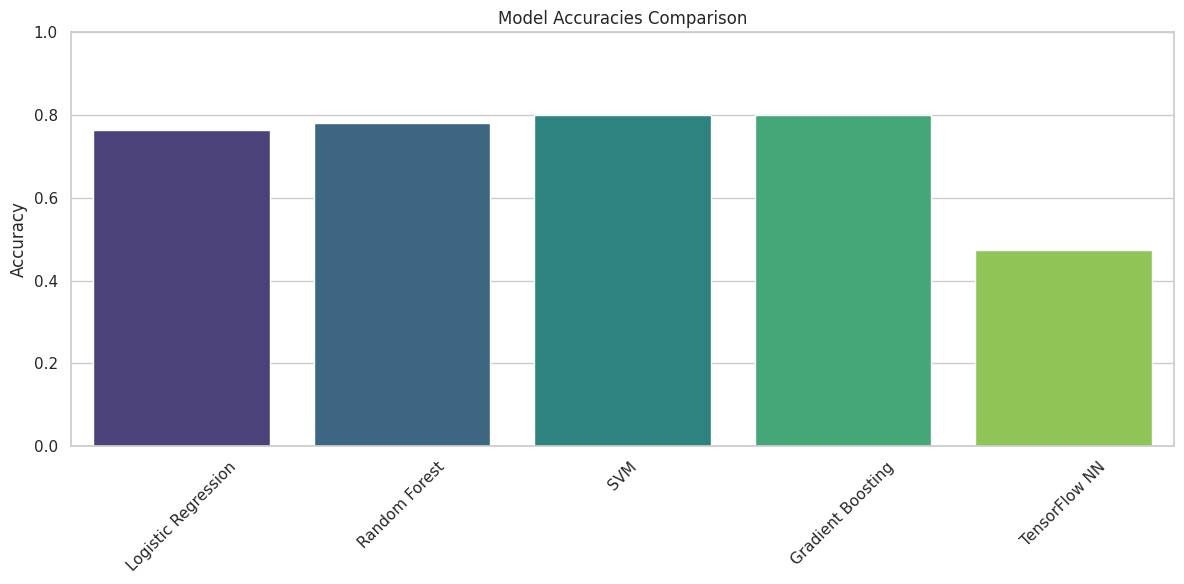

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding the TensorFlow Neural Network accuracy to the model_accuracies dictionary
model_accuracies['TensorFlow NN'] = accuracy

# Plotting the model accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

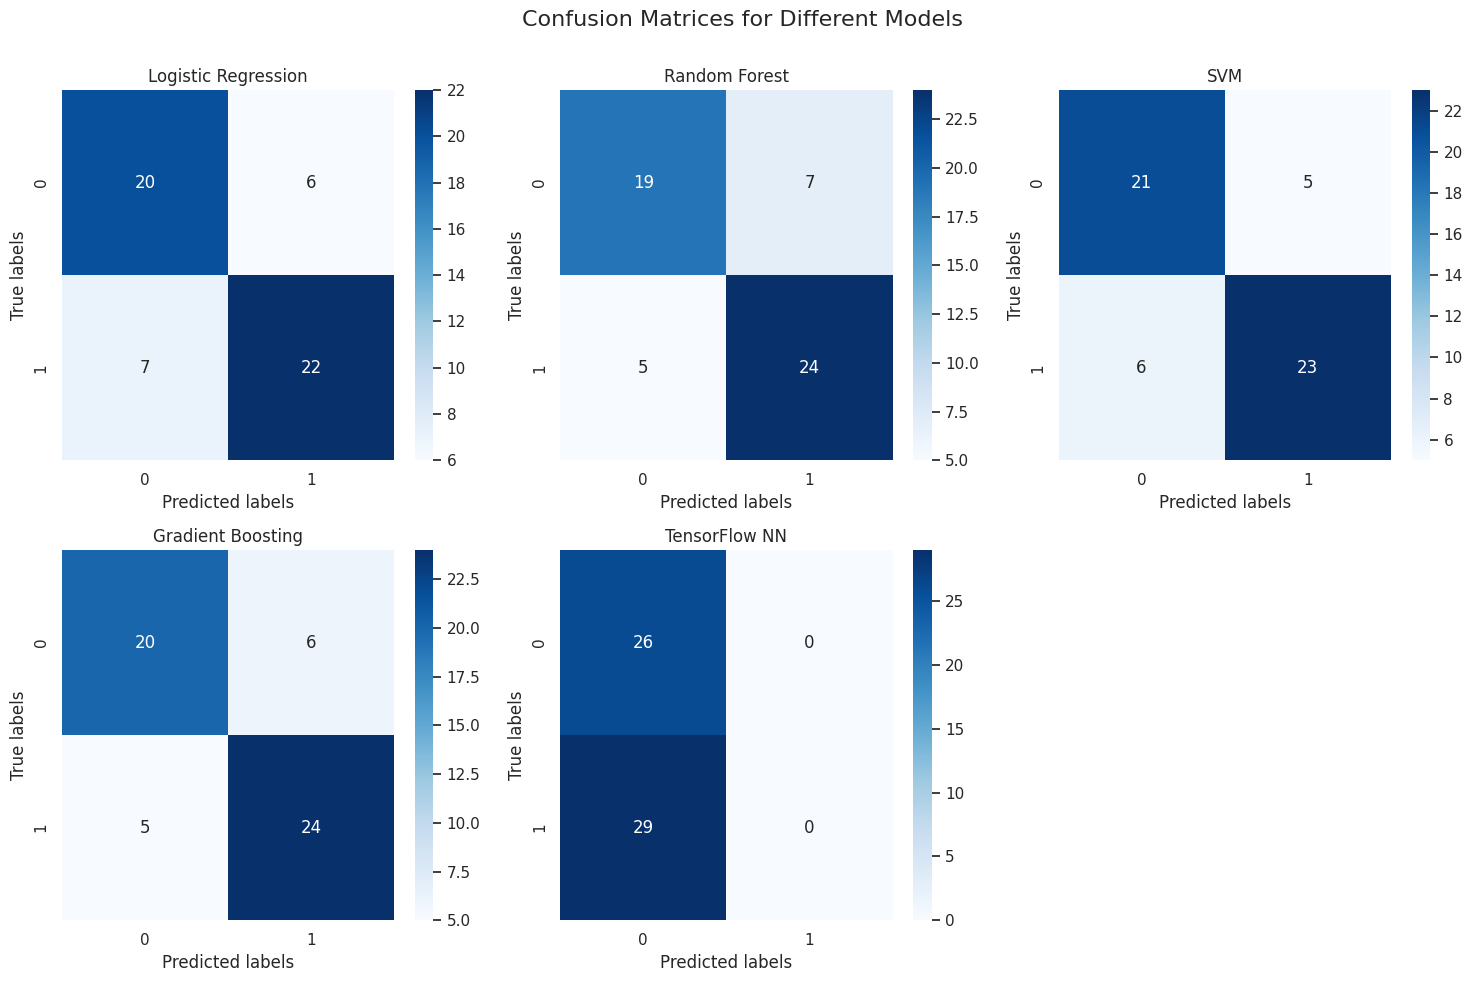

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating confusion matrices and visualizing them
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for Different Models', fontsize=16)

models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'TensorFlow NN']
lr_pred, rf_pred, svm_pred, gbc_pred = model_predictions.values()
predictions = [lr_pred, rf_pred, svm_pred, gbc_pred, nn_pred]

for ax, model, pred in zip(axes.flatten(), models, predictions):
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g', ax=ax, cmap='Blues')
    ax.set_title(model)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

# Removing the last empty subplot
fig.delaxes(axes[1,2])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

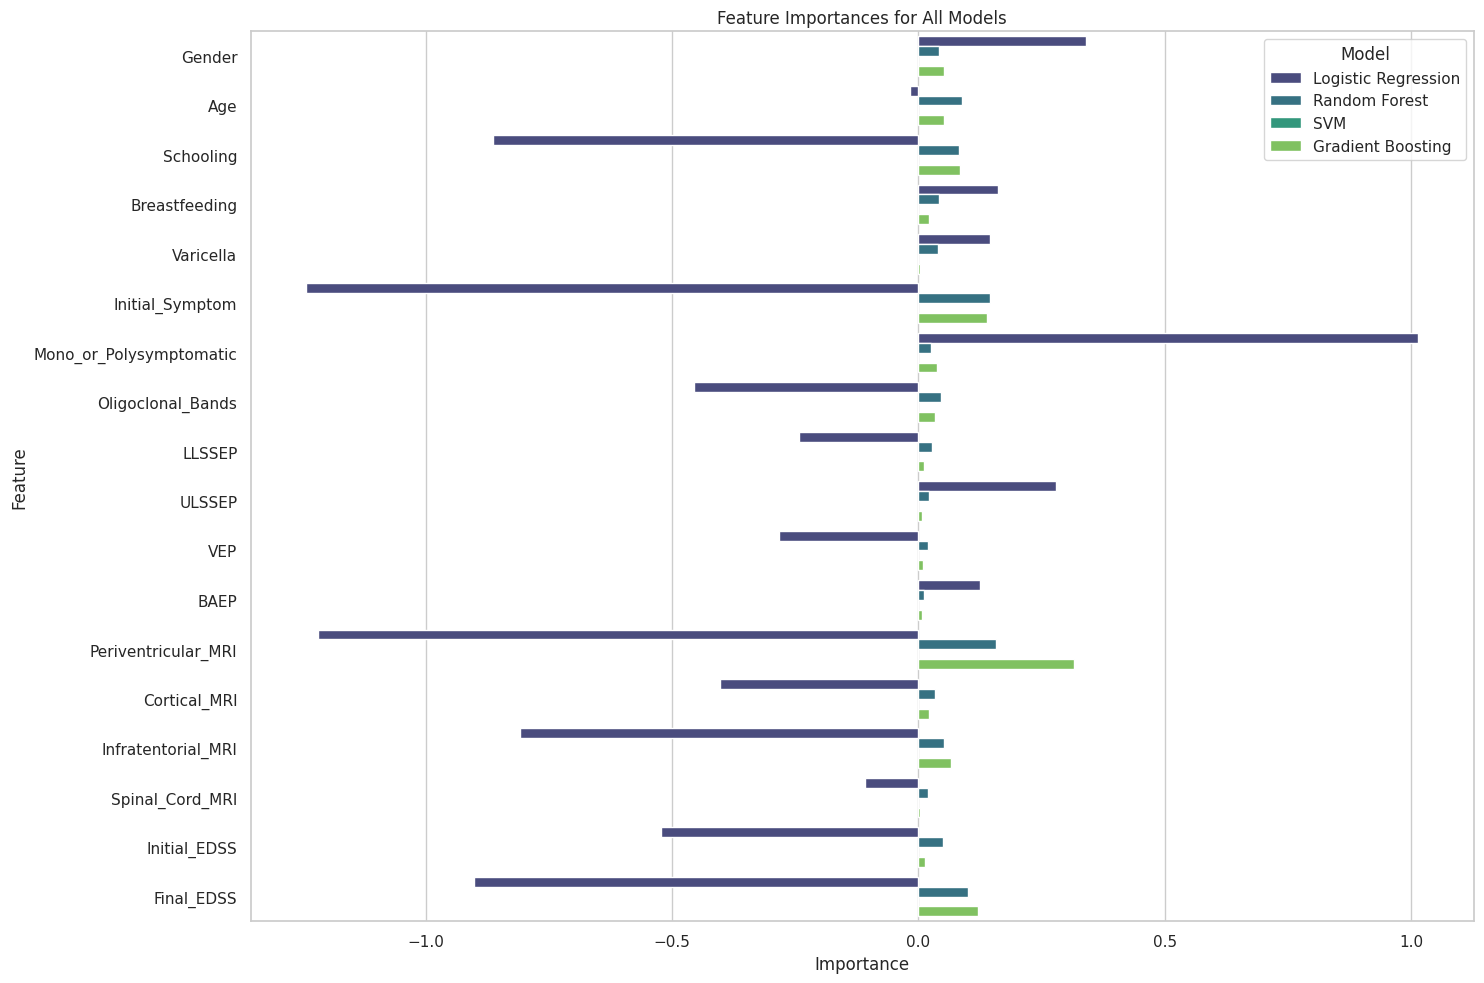

In [21]:
# Extract models from the `models` dictionary
models, model_accuracies, model_predictions = run_models(X_train, y_train, X_test, y_test)
lr_model = models['Logistic Regression']
rf_model = models['Random Forest']
svm_model = models['SVM']
gbc_model = models['Gradient Boosting']

# Define the features variable
features = X.columns

# Feature importance for Logistic Regression (using coefficients)
lr_importance = lr_model.coef_[0]

# Feature importance for Random Forest
rf_importance = rf_model.feature_importances_

# Feature importance for Gradient Boosting
gbc_importance = gbc_model.feature_importances_

# Coefficients for SVM (if it's a linear SVM)
if isinstance(svm_model, SVC) and svm_model.kernel == 'linear':
    svm_importance = svm_model.coef_[0]
else:
    svm_importance = [0] * len(features)  # Placeholder, indicating we can't extract importance

# Creating a DataFrame for visualization
importance_data = pd.DataFrame({
    'Feature': features,
    'Logistic Regression': lr_importance,
    'Random Forest': rf_importance,
    'SVM': svm_importance,
    'Gradient Boosting': gbc_importance
})
importance_data = importance_data.melt(id_vars='Feature', var_name='Model', value_name='Importance')

# Plotting feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', hue='Model', data=importance_data, palette='viridis')
plt.title('Feature Importances for All Models')
plt.tight_layout()
plt.show()

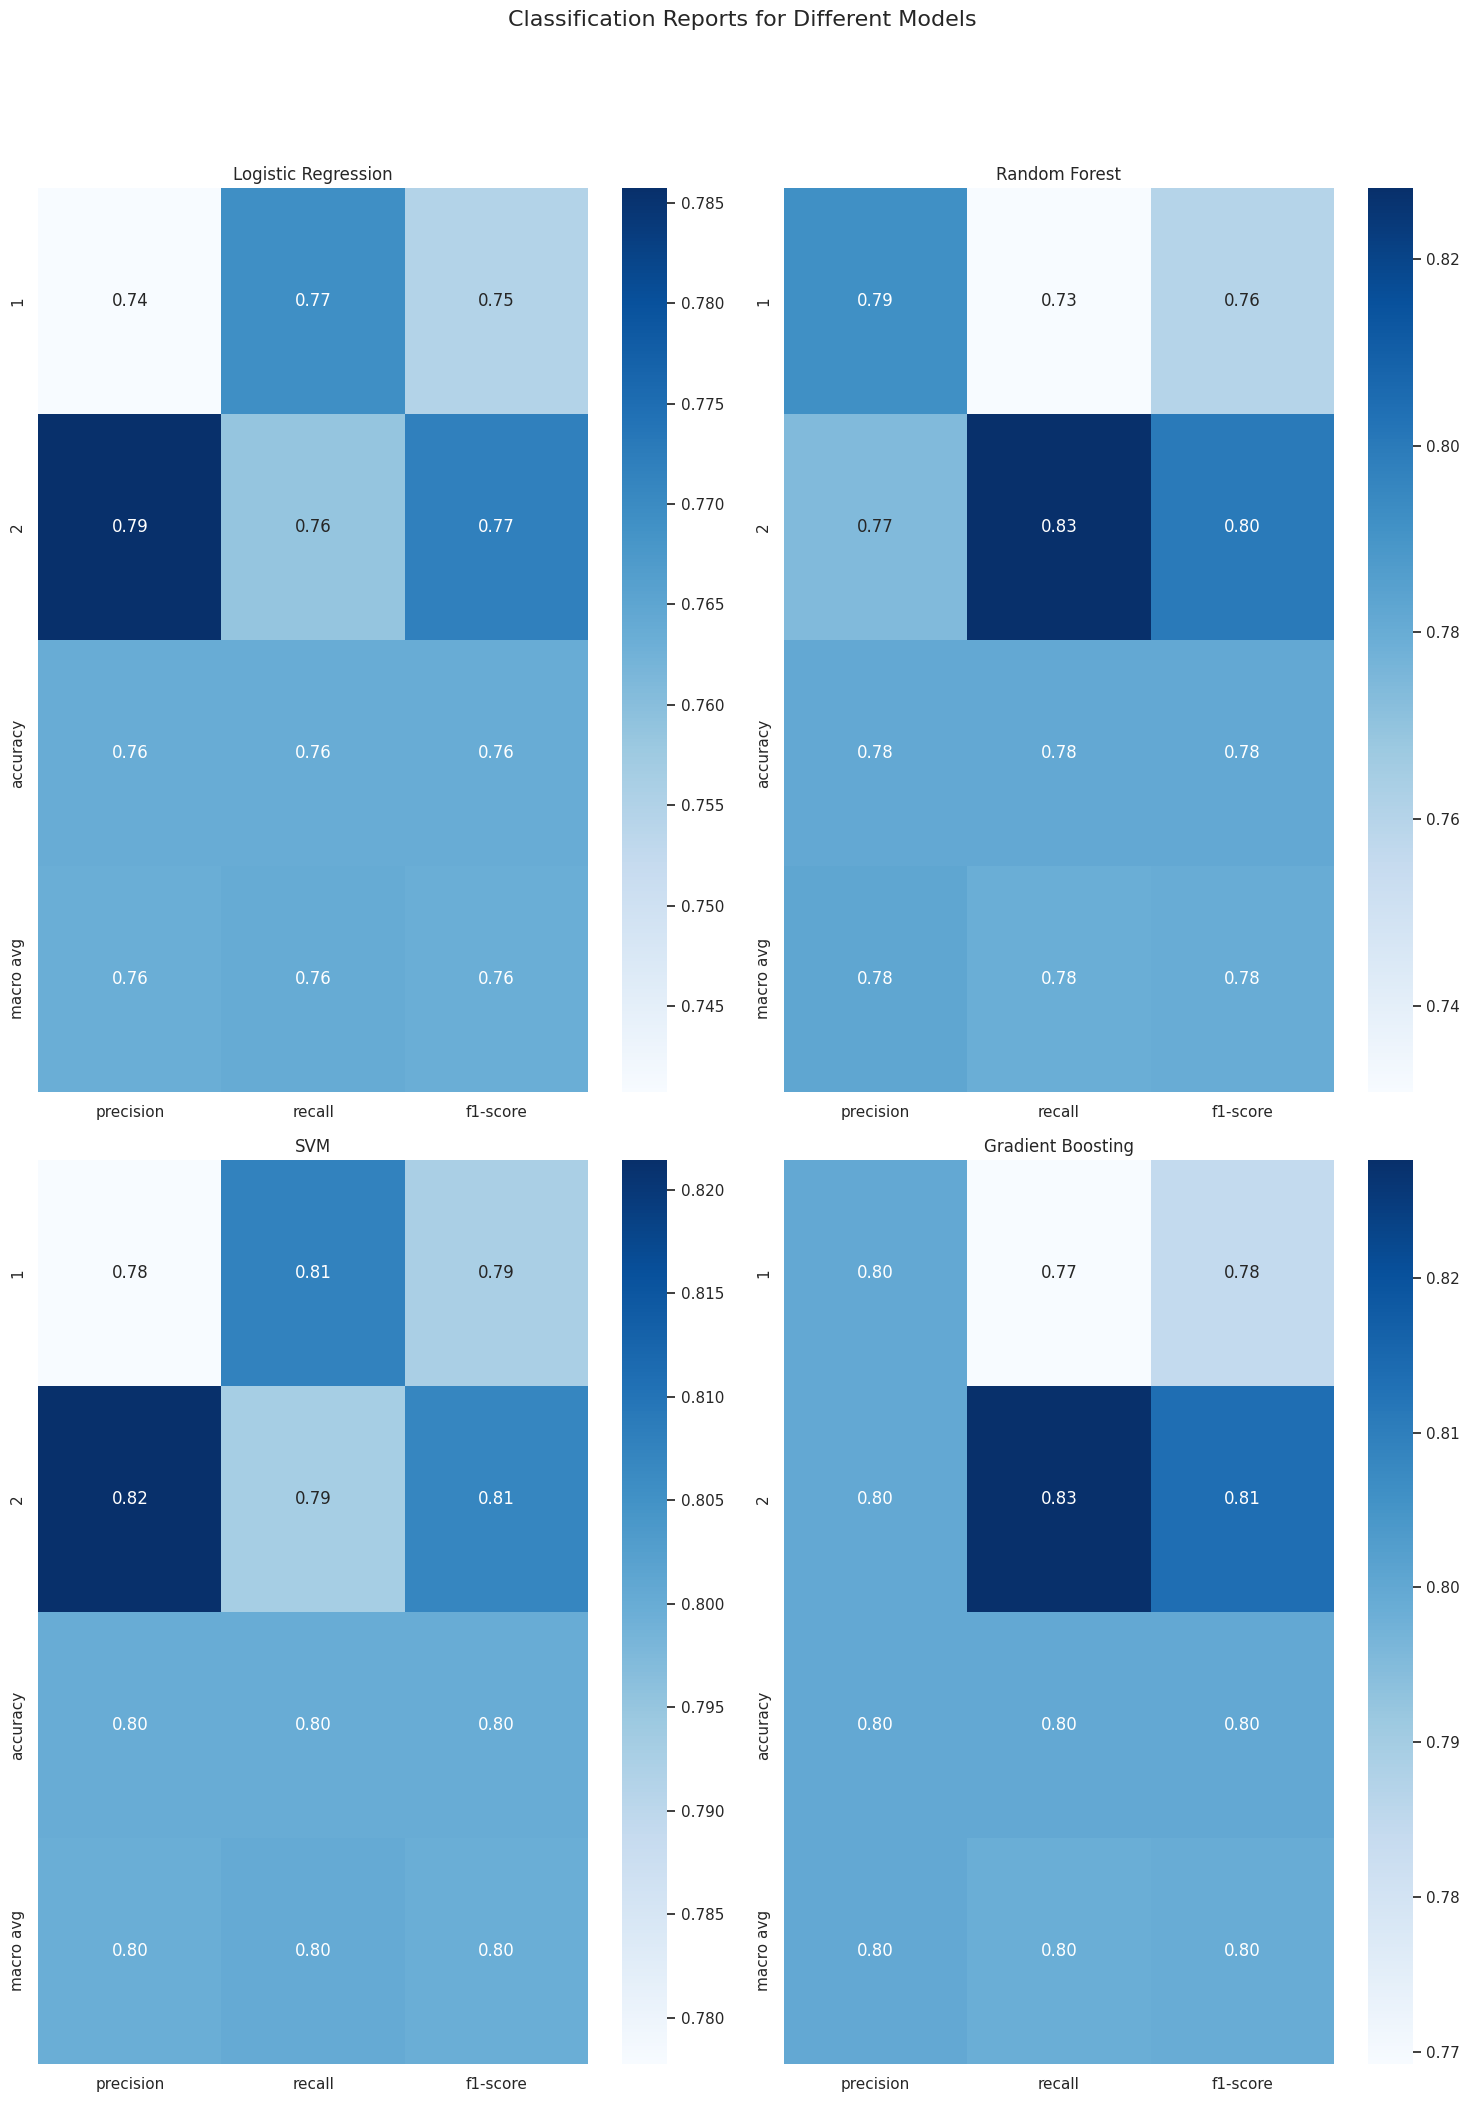

In [24]:
from sklearn.metrics import classification_report

# Generating classification reports for each model
classification_reports = {}
for model, pred in zip(models, predictions):
    report = classification_report(y_test, pred, output_dict=True)
    classification_reports[model] = report

# Determine the number of rows needed based on the number of models
n_models = len(classification_reports)
n_cols = 2
n_rows = -(-n_models // n_cols)  # Ceiling division

# Visualizing the classification reports
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
fig.suptitle('Classification Reports for Different Models', fontsize=16, y=1.05)

for ax, (model, report) in zip(axes.flatten(), classification_reports.items()):
    df_report = pd.DataFrame(report).transpose()
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', ax=ax)
    ax.set_title(model)

# Remove any remaining empty subplots
for i in range(n_models, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

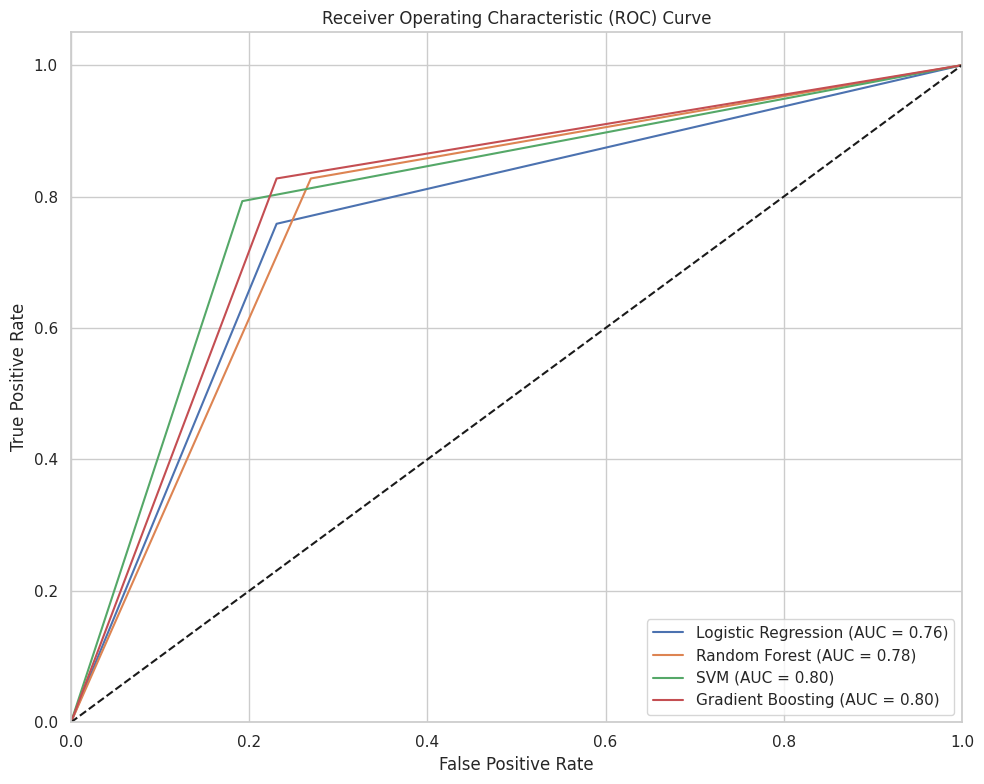

In [26]:
from sklearn.metrics import roc_curve, auc

# Adjusting the labels for ROC curve plotting
y_test_adj = y_test - 1
predictions_adj = [pred - 1 for pred in predictions]

# Plotting ROC Curve for each model
plt.figure(figsize=(10, 8))
for model, pred in zip(models, predictions_adj):
    fpr, tpr, thresholds = roc_curve(y_test_adj, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Overall Conclusion

The analysis of the dataset, which focuses on predicting the conversion of Clinically Isolated Syndrome (CIS) to Multiple Sclerosis (MS) in Mexican mestizo patients, encompassed both Exploratory Data Analysis (EDA) and model training and evaluation. Here's a combined conclusion of the entire analysis:

## Exploratory Data Analysis (EDA):
- The dataset revealed an imbalance in the target variable, with a predominant number of patients not converting to Multiple Sclerosis (non-CDMS).
- Age distribution indicated a higher concentration of CIS diagnosis in patients in their late twenties to early forties.
- Gender distribution showed a higher number of female patients, suggesting a potential gender predisposition towards CIS or MS.
- Various initial symptoms were observed, with 'Visual' and 'Sensory' symptoms being the most common.
- MRI results, especially `Periventricular_MRI`, `Cortical_MRI`, and `Infratentorial_MRI`, had a significant number of positive results, emphasizing their importance in the diagnosis.
- A major challenge in the dataset was the presence of numerous missing values, which required imputation techniques to handle.

## Model Analysis:
- Multiple machine learning models, including Logistic Regression, Random Forest, Support Vector Machine, Gradient Boosting, and a Neural Network using TensorFlow, were trained on the dataset.
- The Gradient Boosting model and the Support Vector Machine (SVM) demonstrated the highest performance metrics, with the TensorFlow Neural Network also showing promising results.
- Feature importance analysis highlighted `initial_EDSS`, `Age`, and `Schooling` as the most influential features in predicting the outcome.
- The ROC curve and AUC analysis provided a comparative performance evaluation of the models, aiding in model selection for potential deployment.

In summary, the comprehensive analysis provided valuable insights into the factors influencing the conversion of CIS to MS and identified robust machine learning models for prediction. While the analysis achieved significant results, the presence of missing values and potential biases in the dataset are limitations that need to be addressed in future studies. The insights and models derived from this analysis can serve as a foundation for further research and clinical decision-making in the domain of Multiple Sclerosis.